### **Amazon Alexa Reviews**

In [1]:
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Libraries for wordcloud making and image importing
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
review_data = pd.read_table('amazon_alexa.tsv')

### **EDA**

In [3]:
review_data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
review_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
np.bincount(review_data['feedback'])
# looks like pretty imbalanced classes

array([ 257, 2893])

In [7]:
review_data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
review_data.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [9]:
review_data.groupby('feedback').count()

,rating,date,variation,verified_reviews
feedback,,,,
0,257,257,257,257
1,2893,2893,2893,2893


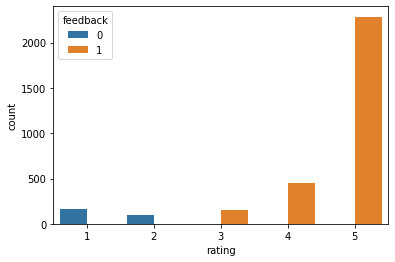

In [10]:
sns.countplot("rating", hue="feedback", data=review_data)
# it is quite expected that a rating under 3 to be a negative one.

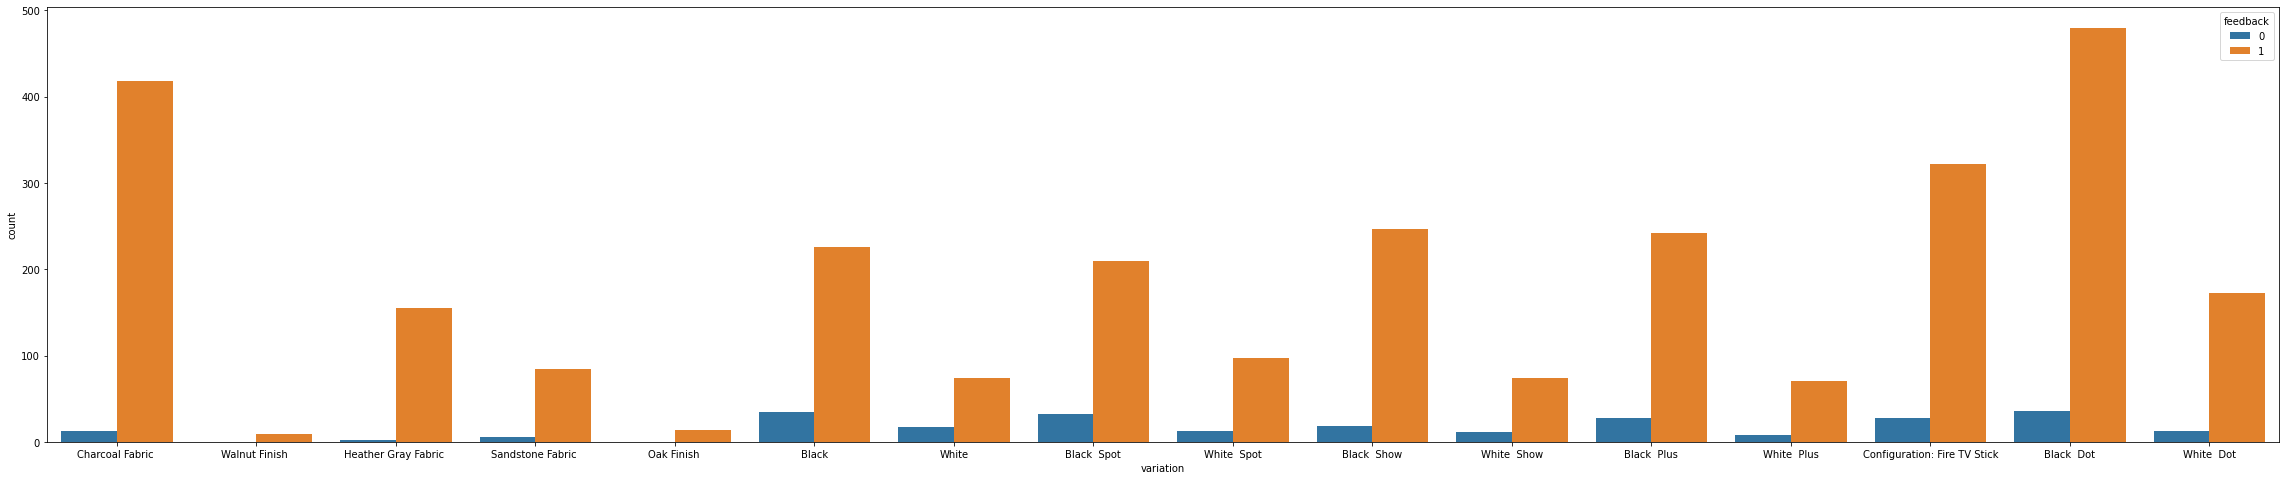

In [11]:
plt.figure(figsize=(40,8))
sns.countplot("variation", hue="feedback", data=review_data)
# Charcoal Fabric and Black Dot are the most bought / rated

**Rating Per Variation**

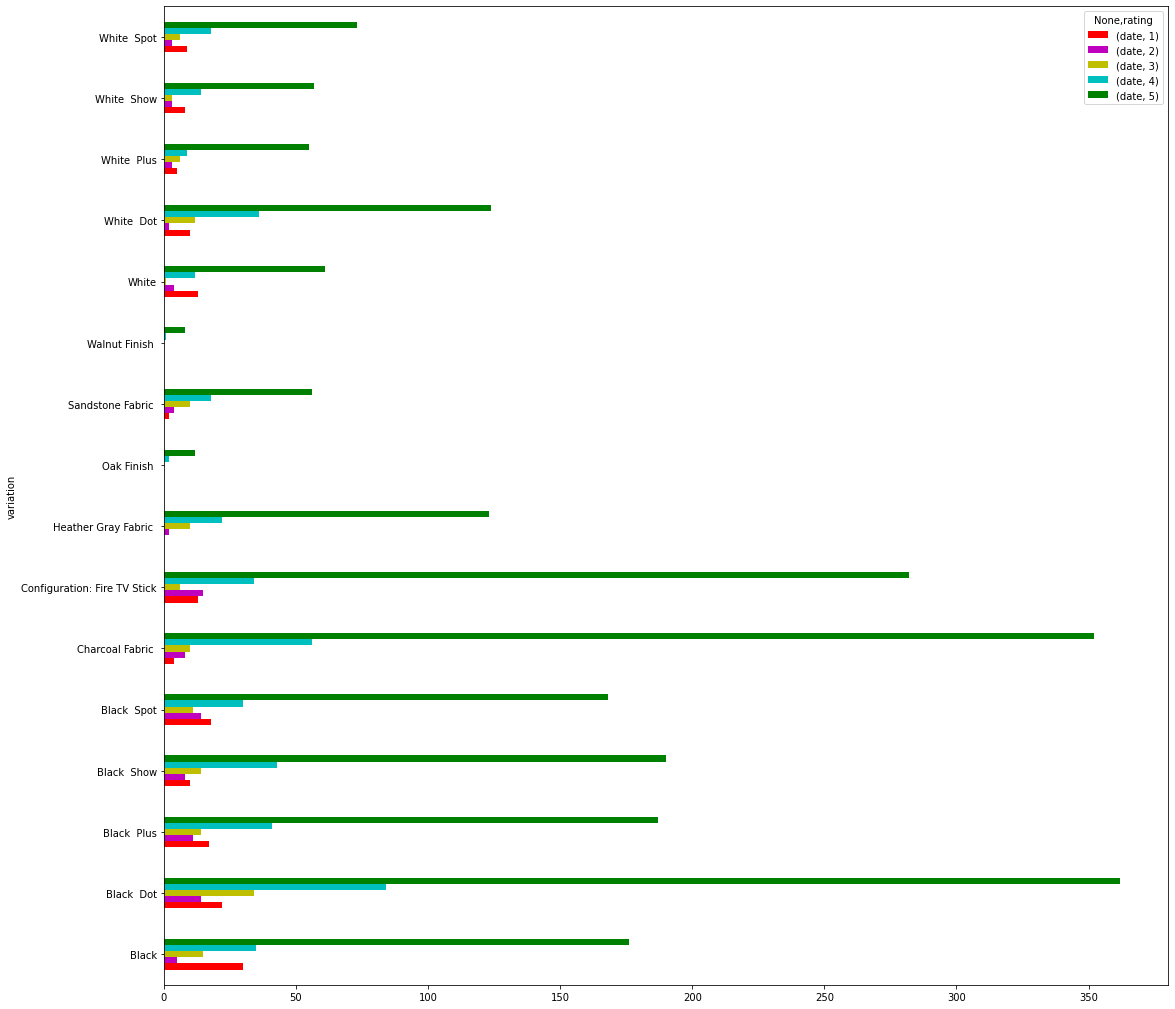

In [12]:
rating_by_variation_df = review_data.groupby(["variation","rating"]).count().drop(columns=['verified_reviews', 'feedback'])
rating_by_variation_df.unstack().plot(kind='barh', color = ['r','m','y','c','g'], legend=True, figsize=(18, 18))

### **Analyzing Data with Wordclouds**

In [13]:
import re
import nltk
from wordcloud import WordCloud, STOPWORDS 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
mystopwordslist = ["amazon","device","alexa","will","time","sound","one","echo","speaker","now","bought",
              "thing","dot","even","product","devices","set","TV","screen","need","show"]
stopwords= STOPWORDS
for  i in mystopwordslist:
    STOPWORDS.add(i)

A = np.array(Image.open('amazon-logo-white.png'))

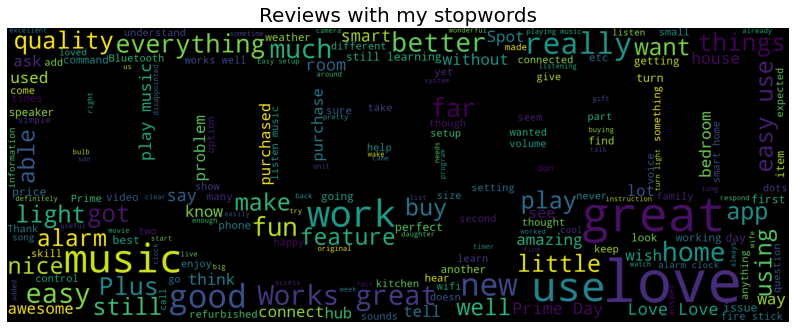

In [15]:
reviews = ' '.join(review_data['verified_reviews'].tolist())
wordcloud = WordCloud(mask=A,stopwords= STOPWORDS,background_color="black").generate(reviews)
plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews with my stopwords", fontsize = 20)
plt.show()


In [16]:
df1 = review_data[review_data["rating"] == 1]
df2 = review_data[review_data["rating"] == 2]
df3 = review_data[review_data["rating"] == 3]
df4 = review_data[review_data["rating"] == 4]
df5 = review_data[review_data["rating"] == 5]

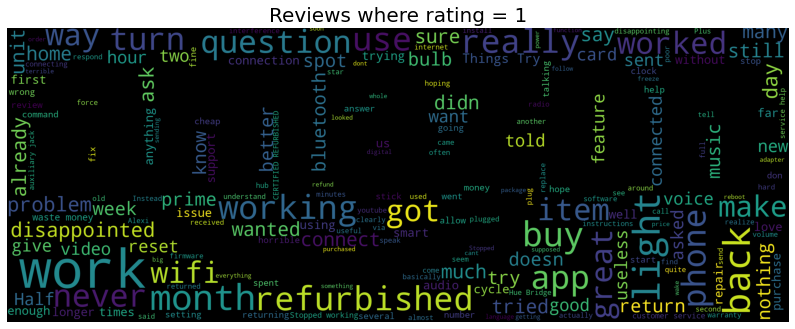

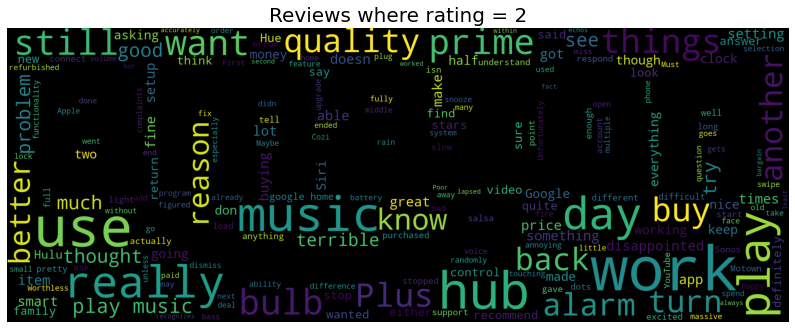

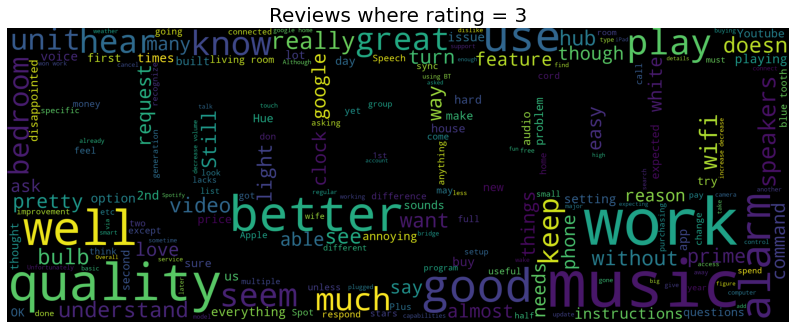

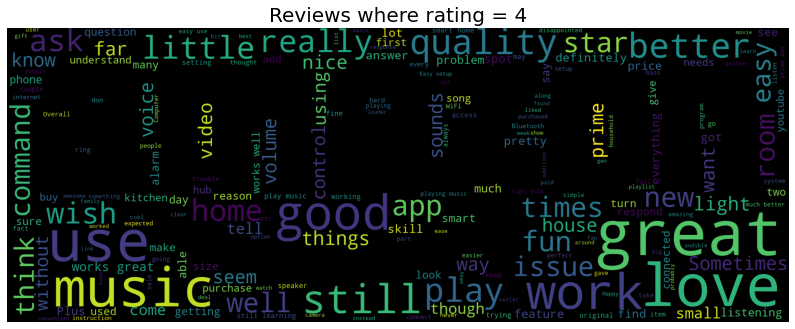

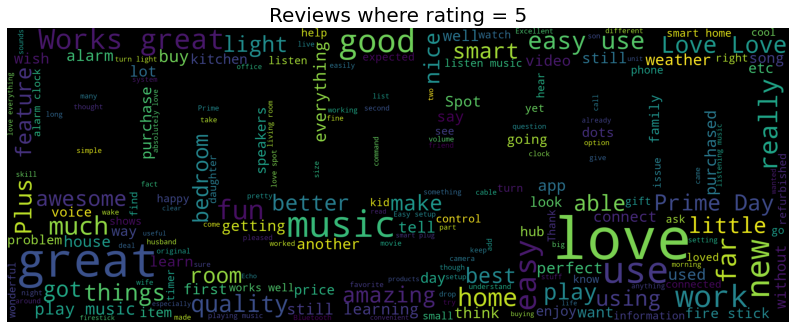

In [17]:
reviews = ' '.join(df1['verified_reviews'].tolist())
wordcloud = WordCloud(mask=A,stopwords= STOPWORDS,background_color="black").generate(reviews)
plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews where rating = 1", fontsize = 20)
plt.show(),

reviews = ' '.join(df2['verified_reviews'].tolist())
wordcloud = WordCloud(mask=A,stopwords= STOPWORDS,background_color="black").generate(reviews)
plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews where rating = 2", fontsize = 20)
plt.show(),

reviews = ' '.join(df3['verified_reviews'].tolist())
wordcloud = WordCloud(mask=A,stopwords= STOPWORDS,background_color="black").generate(reviews)
plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews where rating = 3", fontsize = 20)
plt.show(),

reviews = ' '.join(df4['verified_reviews'].tolist())
wordcloud = WordCloud(mask=A,stopwords= STOPWORDS,background_color="black").generate(reviews)
plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews where rating = 4", fontsize = 20)
plt.show(),

reviews = ' '.join(df5['verified_reviews'].tolist())
wordcloud = WordCloud(mask=A,stopwords= STOPWORDS,background_color="black").generate(reviews)
plt.figure(figsize=(14, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Reviews where rating = 5", fontsize = 20)
plt.show()

**Classifying and analyzing the bad reviews throughout this dataset**

Let's see if we can fix some problems.

In [18]:
review_data = review_data[review_data.rating!=5]
review_data = review_data[review_data.rating!=4]

In [19]:
review_data.head()

,rating,date,variation,verified_reviews,feedback
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
24,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
33,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
49,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [20]:
review_data.shape

(409, 5)

In [21]:
review_data["index"] = range(0,409)
data = review_data.set_index("index")
data.head()

,rating,date,variation,verified_reviews,feedback
index,,,,,
0,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
1,3,30-Jul-18,Sandstone Fabric,"I got a second unit for the bedroom, I was exp...",1
2,3,30-Jul-18,Heather Gray Fabric,The speakers sound pretty good for being so sm...,1
3,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
4,3,30-Jul-18,Charcoal Fabric,No different than Apple. To play a specific li...,1


In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,409):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if not token in STOPWORDS]
    #contain all words that are not in stopwords dictionary
    review=' '.join(review)
    corpus.append(review)
corpus

['without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'got second unit bedroom expect sound improv didnt realli see differ overal big improv st gener',
 'speaker sound pretti good small setup pretti easi bought two reason rate follow instruct synch music unit know done correctli sync primari motiv purchas multipl unit',
 'like siri fact siri answer accur alexa see real need household though good bargain prime day deal',
 'differ appl play specif list music must amazon spotifi plu prime etc account must pay play music star reason everyth els',
 'like googl better',
 'sound terribl u want good music get bose',
 'much featur',
 'annoy everyth show alexa abl download spend much time tri figur phrase machin may well look',
 'know half thing ask recogn sprinkler wifi control even though product detail say compat program chang wifi thermostat set match w

In [24]:
#Finding most commonly used words in bad reviews
words = []
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
words

['without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'got',
 'second',
 'unit',
 'bedroom',
 'expect',
 'sound',
 'improv',
 'didnt',
 'realli',
 'see',
 'differ',
 'overal',
 'big',
 'improv',
 'st',
 'gener',
 'speaker',
 'sound',
 'pretti',
 'good',
 'small',
 'setup',
 'pretti',
 'easi',
 'bought',
 'two',
 'reason',
 'rate',
 'follow',
 'instruct',
 'synch',
 'music',
 'unit',
 'know',
 'done',
 'correctli',
 'sync',
 'primari',
 'motiv',
 'purchas',
 'multipl',
 'unit',
 'like',
 'siri',
 'fact',
 'siri',
 'answer',
 'accur',
 'alexa',
 'see',
 'real',
 'need',
 'household',
 'though',
 'good',
 'bargain',
 'prime',
 'day',
 'deal',
 'differ',
 'appl',
 'play',
 'specif',
 'list',
 'music',
 'must',
 'amazon',
 'sp

In [25]:
from collections import Counter
words_counts = Counter(words)
print(words_counts)

Counter({'echo': 150, 'work': 140, 'alexa': 108, 'devic': 108, 'use': 88, 'amazon': 84, 'like': 81, 'get': 77, 'dot': 76, 'time': 73, 'sound': 71, 'would': 70, 'speaker': 69, 'music': 60, 'one': 58, 'product': 57, 'tri': 53, 'thing': 53, 'play': 52, 'set': 51, 'need': 48, 'ask': 44, 'want': 44, 'buy': 44, 'connect': 43, 'screen': 43, 'better': 41, 'also': 41, 'qualiti': 40, 'show': 38, 'realli': 37, 'bought': 37, 'even': 37, 'good': 36, 'turn': 36, 'hub': 34, 'know': 33, 'well': 33, 'great': 32, 'much': 31, 'disappoint': 31, 'bulb': 31, 'could': 30, 'still': 30, 'alarm': 29, 'prime': 29, 'day': 29, 'light': 29, 'app': 27, 'back': 27, 'say': 26, 'return': 26, 'home': 26, 'see': 25, 'googl': 25, 'make': 25, 'purchas': 24, 'problem': 24, 'phone': 24, 'hear': 23, 'got': 23, 'stop': 23, 'go': 23, 'seem': 22, 'way': 22, 'money': 22, 'refurbish': 22, 'video': 22, 'question': 21, 'unit': 21, 'wifi': 21, 'mani': 20, 'differ': 20, 'plu': 20, 'understand': 20, 'sure': 20, 'item': 20, 'start': 20,

In [26]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words

[('echo', 150),
 ('work', 140),
 ('alexa', 108),
 ('devic', 108),
 ('use', 88),
 ('amazon', 84),
 ('like', 81),
 ('get', 77),
 ('dot', 76),
 ('time', 73),
 ('sound', 71),
 ('would', 70),
 ('speaker', 69),
 ('music', 60),
 ('one', 58),
 ('product', 57),
 ('tri', 53),
 ('thing', 53),
 ('play', 52),
 ('set', 51),
 ('need', 48),
 ('ask', 44),
 ('want', 44),
 ('buy', 44),
 ('connect', 43),
 ('screen', 43),
 ('better', 41),
 ('also', 41),
 ('qualiti', 40),
 ('show', 38),
 ('realli', 37),
 ('bought', 37),
 ('even', 37),
 ('good', 36),
 ('turn', 36),
 ('hub', 34),
 ('know', 33),
 ('well', 33),
 ('great', 32),
 ('much', 31),
 ('disappoint', 31),
 ('bulb', 31),
 ('could', 30),
 ('still', 30),
 ('alarm', 29),
 ('prime', 29),
 ('day', 29),
 ('light', 29),
 ('app', 27),
 ('back', 27),
 ('say', 26),
 ('return', 26),
 ('home', 26),
 ('see', 25),
 ('googl', 25),
 ('make', 25),
 ('purchas', 24),
 ('problem', 24),
 ('phone', 24),
 ('hear', 23),
 ('got', 23),
 ('stop', 23),
 ('go', 23),
 ('seem', 22),
 (

In [27]:
most_common_wordList = []
most_common_CountList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_CountList.append(y)

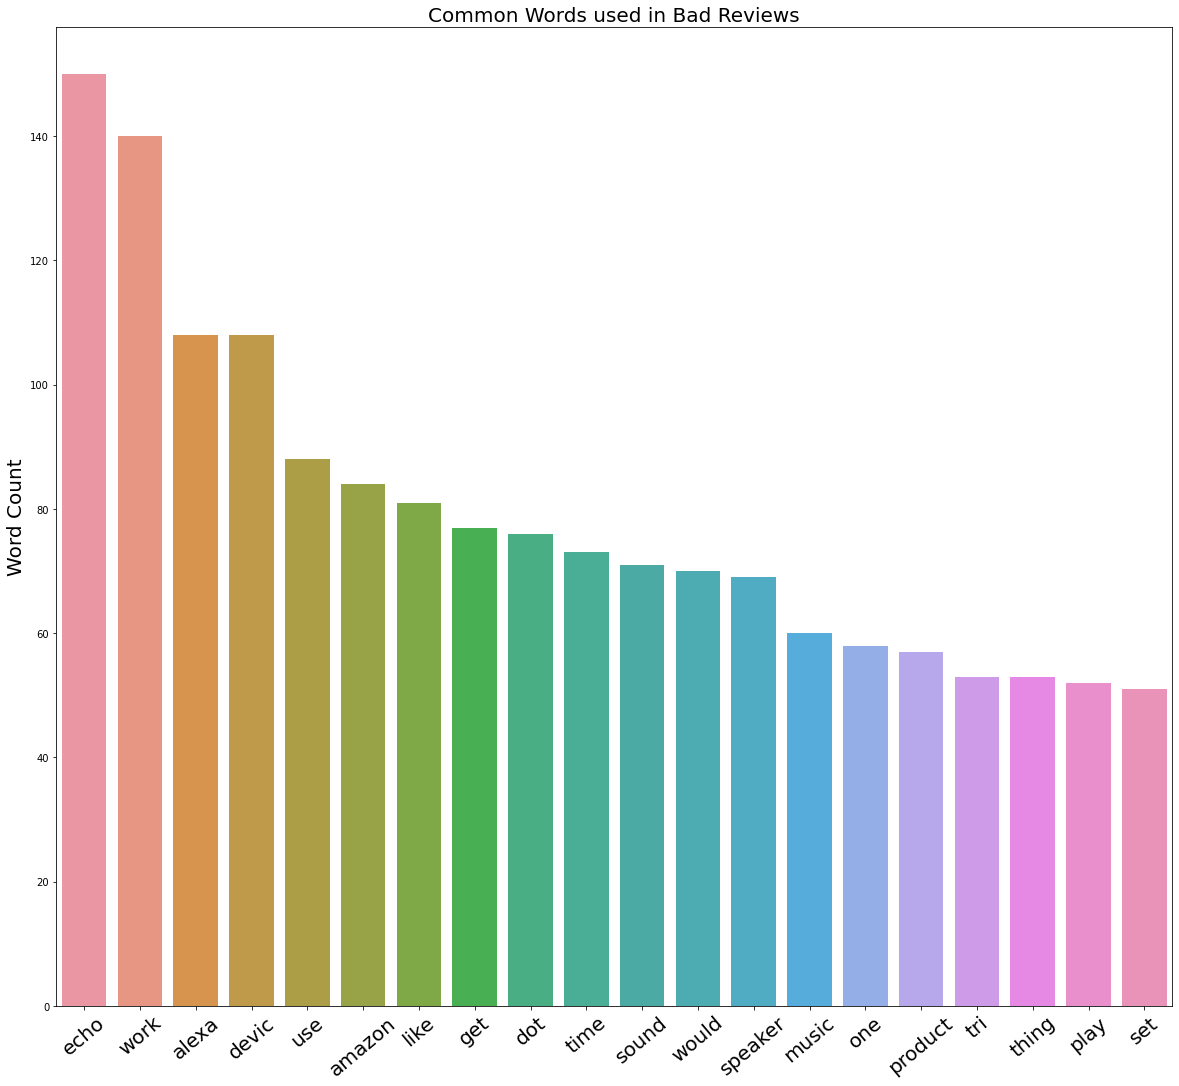

In [28]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(20), most_common_CountList[0:20])
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(20), most_common_wordList[0:20], fontsize=20, rotation=40)
plt.title('Common Words used in Bad Reviews', fontsize=20)
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts = ["good sound",
         "not good sound",
         "did not like",
         "I like it",
         "good speaker"]
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
features = tfidf.fit_transform(texts)
tfidf.get_feature_names()

['good sound', 'like', 'not', 'sound']

In [30]:
tdf_data = pd.DataFrame(tfidf.fit_transform(review_data['verified_reviews']).toarray())
print(tdf_data)

     0     1     2        3     4     ...  3654  3655  3656  3657  3658
0     0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
1     0.0   0.0   0.0  0.14552   0.0  ...   0.0   0.0   0.0   0.0   0.0
2     0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
3     0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
4     0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
..    ...   ...   ...      ...   ...  ...   ...   ...   ...   ...   ...
404   0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
405   0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
406   0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
407   0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0
408   0.0   0.0   0.0  0.00000   0.0  ...   0.0   0.0   0.0   0.0   0.0

[409 rows x 3659 columns]


### **Splitting up the bad reviews into train/test sets**

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score,roc_curve,auc

In [32]:
vectorize = TfidfVectorizer(analyzer='word',stop_words='english',ngram_range=(1, 2),min_df=2)
X = vectorize.fit_transform(corpus).toarray()
y = data['feedback']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Random Forest Classifier**

In [34]:
model1 = RandomForestClassifier(n_estimators=200, max_features="auto")
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred1 = model1.predict(x_test)
accuracy1 = accuracy_score(y_test,y_pred1)
print("Accuracy Score for RandomForest:\t"+str(accuracy1))
print("Precision Score for RandomForest:\t"+str(precision_score(y_test,y_pred1)))
print("Recall Score for RandomForest:\t"+str(recall_score(y_test,y_pred1)))

Accuracy Score for RandomForest:	0.7281553398058253
Precision Score for RandomForest:	0.7142857142857143
Recall Score for RandomForest:	0.40540540540540543


**Gradient Boosting Classifier**

In [36]:
model2 = GradientBoostingClassifier(learning_rate=1.5, verbose=1, max_features='auto')
model2.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1331            1.28s
         2           1.0331            1.11s
         3           0.9339            1.05s
         4           0.8461            1.01s
         5           0.7497            0.99s
         6           0.6805            0.98s
         7           0.6068            1.00s
         8           0.5270            0.98s
         9           0.4695            0.96s
        10           0.4261            0.98s
        20           0.2078            0.85s
        30           0.1571            0.72s
        40           0.1405            0.62s
        50           0.1318            0.52s
        60           0.1269            0.41s
        70           0.1249            0.31s
        80           0.1240            0.21s
        90           0.1234            0.10s
       100           0.1230            0.00s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [37]:
y_pred2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test,y_pred2)
print("Accuracy Score for GradientBoosting:\t"+str(accuracy2))
print("Precision Score for GradientBoosting:\t"+str(precision_score(y_test,y_pred2)))
print("Recall Score for GradientBoosting:\t"+str(recall_score(y_test,y_pred2)))

Accuracy Score for GradientBoosting:	0.6796116504854369
Precision Score for GradientBoosting:	0.5769230769230769
Recall Score for GradientBoosting:	0.40540540540540543


In [38]:
prob_1 = model1.predict_proba(x_test)
prob_1 = prob_1[:,1]# Probability prediction for Random Forest classifier
prob_2=model2.predict_proba(x_test)
prob_2 = prob_2[:,1]# Probability prediction for GradientBoosting classifier

**Plotting The ROC and Precision Recall Curve**

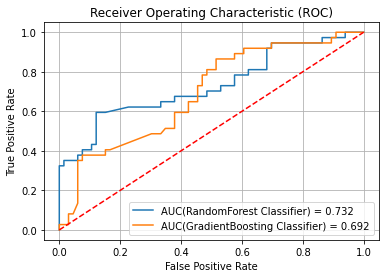

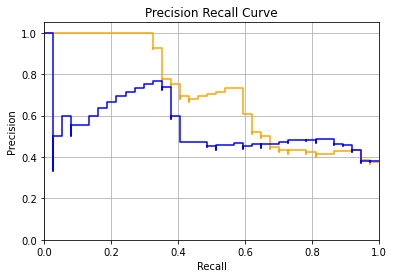

In [39]:
fpr1, tpr1, _ = roc_curve(y_test, prob_1)
fpr2, tpr2, _ = roc_curve(y_test, prob_2)

#Receiver Operating Curve(ROC)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr1, tpr1, label = 'AUC(RandomForest Classifier) = %0.3f' % auc(fpr1, tpr1))
plt.plot(fpr2, tpr2, label = 'AUC(GradientBoosting Classifier) = %0.3f' % auc(fpr2, tpr2))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True)
plt.show()

#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
precision1, recall1, _ = precision_recall_curve(y_test, prob_1)
precision2, recall2, _ = precision_recall_curve(y_test, prob_2)

plt.step(recall1, precision1, color='orange', where='post')
plt.step(recall2, precision2, color='blue', where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision Recall Curve')
plt.grid(True)

plt.show()

**Random Forest Classification Report**

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

print('Random Forest Classification Report',classification_report(y_test,y_pred1))
print('Confusion Matrix',confusion_matrix(y_test,y_pred1))
print('Accuracy Score',accuracy_score(y_test,y_pred1))
print('Precision Score',precision_score(y_test,y_pred1))
print('Recall Score',recall_score(y_test,y_pred1))
print('F1 Score',f1_score(y_test,y_pred1))

Random Forest Classification Report               precision    recall  f1-score   support

           0       0.73      0.91      0.81        66
           1       0.71      0.41      0.52        37

    accuracy                           0.73       103
   macro avg       0.72      0.66      0.66       103
weighted avg       0.73      0.73      0.71       103

Confusion Matrix [[60  6]
 [22 15]]
Accuracy Score 0.7281553398058253
Precision Score 0.7142857142857143
Recall Score 0.40540540540540543
F1 Score 0.5172413793103449


**Gradient Boosting Classification Report**

In [41]:
print('Gradient Boosting Classification Report',classification_report(y_test,y_pred2))
print('Confusion Matrix',confusion_matrix(y_test,y_pred2))
print('Accuracy Score',accuracy_score(y_test,y_pred2))
print('Precision Score',precision_score(y_test,y_pred2))
print('Recall Score',recall_score(y_test,y_pred2))
print('F1 Score',f1_score(y_test,y_pred2))

Gradient Boosting Classification Report               precision    recall  f1-score   support

           0       0.71      0.83      0.77        66
           1       0.58      0.41      0.48        37

    accuracy                           0.68       103
   macro avg       0.65      0.62      0.62       103
weighted avg       0.66      0.68      0.66       103

Confusion Matrix [[55 11]
 [22 15]]
Accuracy Score 0.6796116504854369
Precision Score 0.5769230769230769
Recall Score 0.40540540540540543
F1 Score 0.47619047619047616
